In [1]:
!pip install geopy

In [2]:
import pandas as pd
import folium
from geopy.geocoders import Nominatim

In [3]:
# エクセルデータを読み込む
data = pd.read_csv("000972643.csv")

In [4]:
data

,市区町村\n団体コード,都道府県,市町村名,寄付件数,寄付金額
0,10006,北海道,NaN,"4,770","847,712,500"
1,11002,北海道,札幌市,"117,929","3,124,976,318"
2,12025,北海道,函館市,"83,044","1,522,472,000"
3,12033,北海道,小樽市,"45,610","832,635,071"
4,12041,北海道,旭川市,"163,571","2,794,906,556"
...,...,...,...,...,...
1783,473618,沖縄県,久米島町,"9,451","149,797,400"
1784,473626,沖縄県,八重瀬町,"66,123","1,060,923,700"
1785,473758,沖縄県,多良間村,976,"14,304,000"
1786,473812,沖縄県,竹富町,"8,249","382,860,844"


# 必要な列を抽出
columns = ["都道府県", "市町村名", "寄付件数", "寄付金額"]
data = data[columns]

# Geopyを使って緯度経度を取得
geolocator = Nominatim(user_agent="myGeocoder")
locations = []

for index, row in data.iterrows():
    try:
        location = geolocator.geocode(f"{row['市町村名']}, {row['都道府県']}, Japan")
        if location:
            locations.append((location.latitude, location.longitude))
        else:
            locations.append((None, None))
    except:
        locations.append((None, None))

data["latitude"] = [loc[0] for loc in locations]
data["longitude"] = [loc[1] for loc in locations]

# Foliumマップの作成
m = folium.Map(location=[35.6895, 139.6917], zoom_start=6)  # 日本中央付近

for index, row in data.iterrows():
    if not pd.isna(row["latitude"]) and not pd.isna(row["longitude"]):
        folium.Marker(
            location=[row["latitude"], row["longitude"]],
            popup=f"市町村名: {row['市町村名']}<br>寄付件数: {row['寄付件数']}<br>寄付金額: {row['寄付金額']}",
        ).add_to(m)

# 地図を保存
m.save("map.html")

ChatGPTは、Geolocatorを使って緯度経度を自動で探そうとする。Grok2の場合は、諦める。なので、緯度経度はChatGPTの方が得意そうだが、流石にふるさと納税はデータが膨大らしく、ローカルマシンのPythonでは限界を感じた。・・・よく考えれば、これ、Cognosの方が早いかも。

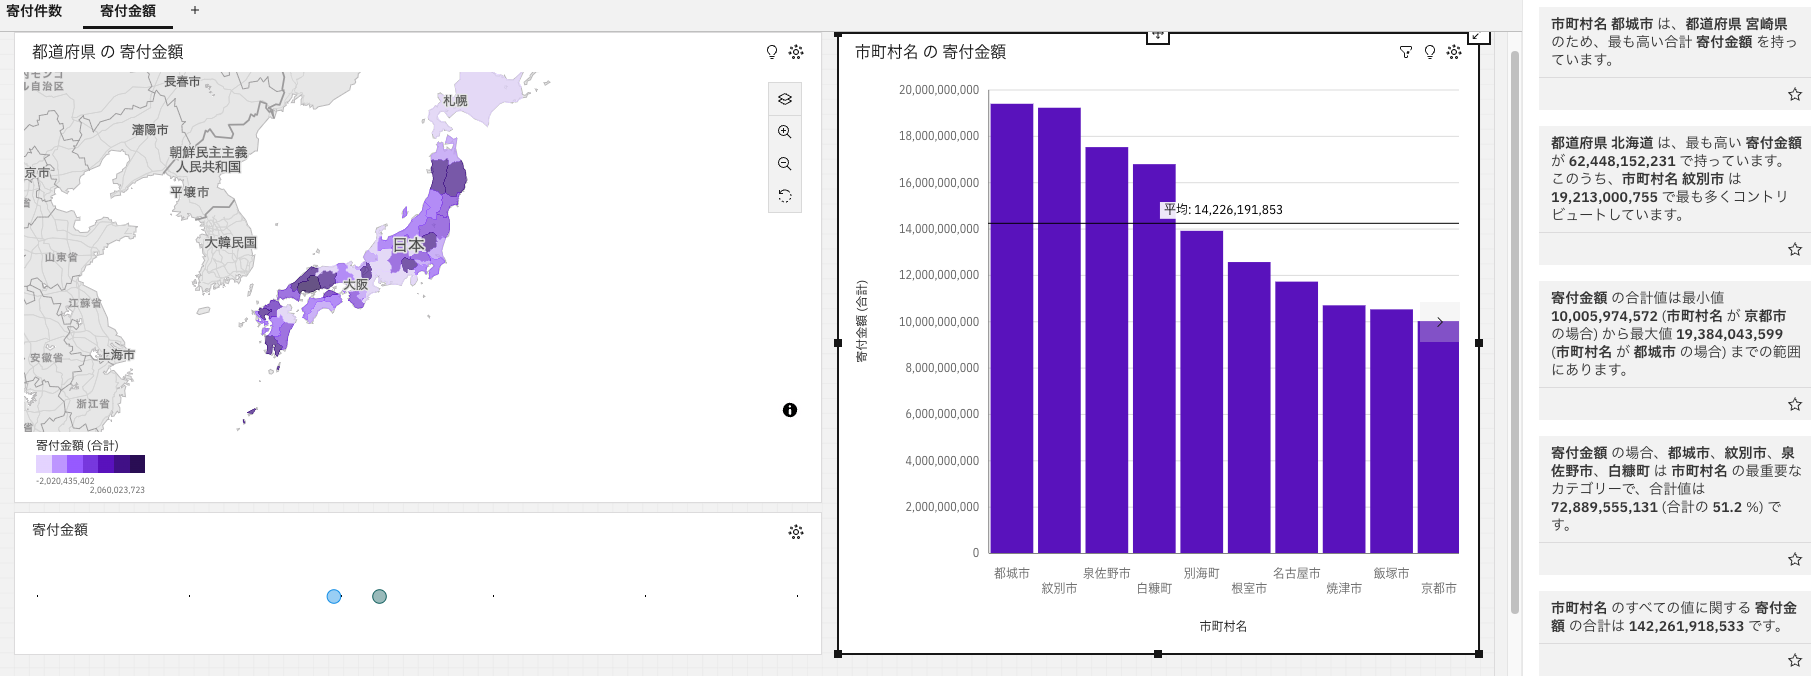

In [14]:
#やっぱりCognosが早かった。CSVにして投入して、ボタン一発でダッシュボード生成。
from IPython.display import Image
Image(filename='FurusatoTaxpaymentVisualization.png')